# ASSIGNMENT 32

In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

## BUILDING THE TIME SERIES

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64


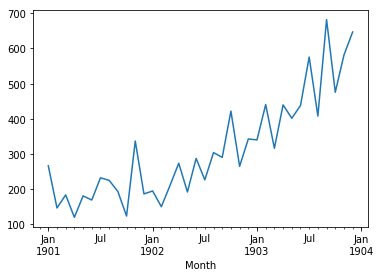

In [2]:
# Defining a function to parse the Date-Time Field and taking an arbitrary year as the baseline
def parser(x):
    return datetime.strptime('19'+x, '%Y-%b')
 
# Populating a series by parsing the data
series = read_csv('shampoo_sales.csv', header=0,nrows=36, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

# Printing the top 5 rows 
print(series.head())

# Plotting the time-series data
series.plot()
pyplot.show()

## TESTING STATIONARITY

In [3]:
# By looking at the graph we can conclude that the Time-Series is non-stationary
# Performing some tests to check for stationarity

from statsmodels.tsa.stattools import adfuller

def plot_rolling_statistics(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
        
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.figure(figsize=(10,20))

    plt.show()
    
    

def dickey_fuller_test(timeseries):
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    
    
    
    
def test_stationarity(timeseries):
    
    plot_rolling_statistics(timeseries)
    dickey_fuller_test(timeseries)
    

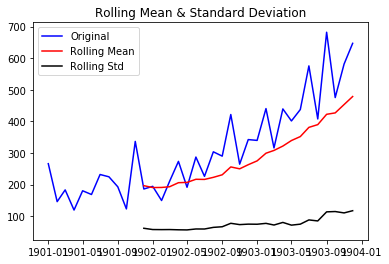

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                  3.060142
p-value                         1.000000
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [4]:
test_stationarity(series)

In [5]:
# Clearly, the Test Statistic > Critical Value. Thus, the given time-series is not stationary

## PLOTTING AUTOCORRELATION

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


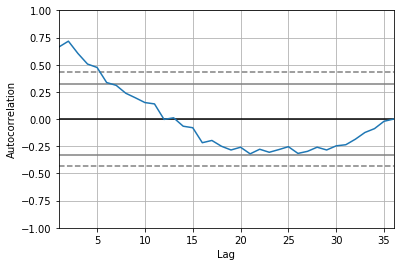

In [6]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

## ANALYSING RESIDUALS

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will 

                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Fri, 09 Nov 2018   AIC                            406.340
Time:                                                 18:56:28   BIC                            417.227
Sample:                                             02-01-1901   HQIC                           410.098
                                                  - 12-01-1903                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

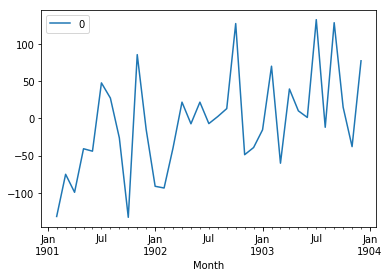

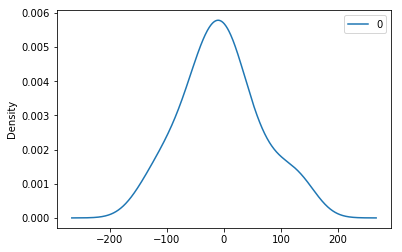

In [7]:
'''
We can notice that there is a positive correlation within the first 10-12 lags.
Thus we couls use 5 as a model parameter.
In order to make the series stationary we could fit the entire time series to an ARIMA model with parameters (5,1,0)
This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and 
uses a moving average model of 0.

'''
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plotting the residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()


In [8]:
residuals.describe()

,0
count,35.000000
mean,-5.495218
std,68.132882
min,-133.296637
25%,-42.477890
50%,-7.186512
75%,24.748330
max,133.237936


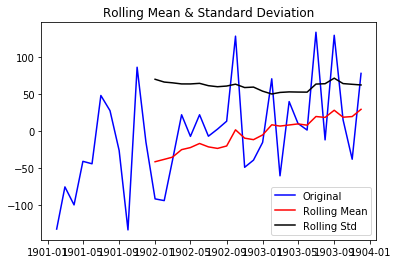

<Figure size 720x1440 with 0 Axes>

In [9]:
plot_rolling_statistics(residuals)

In [10]:
# Performing the Durbin Watson Test

import statsmodels.api as sm
model = ARIMA(series, order=(5,1,0))  
results_ARIMA = model.fit()  

print(sm.stats.durbin_watson(results_ARIMA.resid.values))


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will 

1.713403990074023


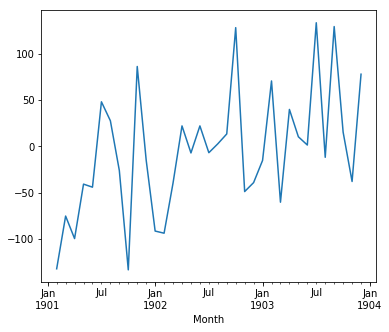

In [11]:
# Plotting the residuals
%matplotlib inline
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax = results_ARIMA.resid.plot(ax=ax);

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


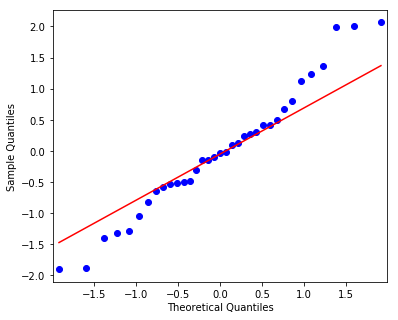

In [12]:
# Visualising residuals using a qqplot
resid20 = results_ARIMA.resid
from statsmodels.graphics.api import qqplot
%matplotlib inline
fig = plt.figure(figsize=(6,5))

ax = fig.add_subplot(111)

fig = qqplot(resid20, line='q', ax=ax, fit=True)

## MODEL AUTOCORRELATION

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


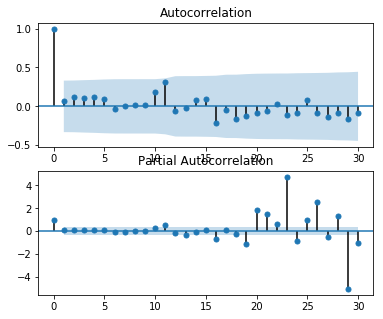

In [13]:
%matplotlib inline
fig = plt.figure(figsize=(6,5))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid20.values.squeeze(), lags=30, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid20, lags=30, ax=ax2)

## ROLLING FORECAST ARIMA MODEL

In [14]:
# Rolling Forecast ARIMA Model

X = series.values
size = int(len(X) * 0.66)

# Splitting the data into train and test datasets in the ratio 66.66% AND 33.33%
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# Fitting and predicting the values using the forecast function and re-creating the ARIMA model after each new observation is
# received

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)



C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

## PLOTTING THE PREDICTES VALUES

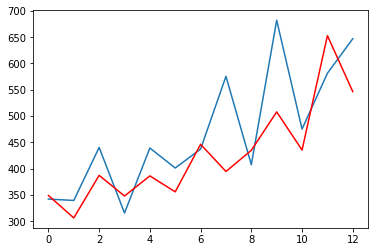

In [15]:
# plotting the actual and predicted values
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## MEAN SQUARED ERROR

In [16]:
# Finding out the MSE 
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 6958.324
